In [3]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.tools.python.tool import PythonREPLTool
from langchain.llms.openai import OpenAI
from langchain.agents.agent_types import AgentType
agent_executor = create_python_agent(
    llm=OpenAI(temperature=0, max_tokens=1000),
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)
agent_executor.run(
    """Understand, write a single neuron neural network in PyTorch.
Take synthetic data for y=2x. Train for 1000 epochs and print every 100 epochs.
Return prediction for x = 5"""
)




> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


 I need to write a neural network in PyTorch and train it on the given data
Action: Python_REPL
Action Input: 
import torch

# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)

# Define the loss
loss_fn = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Define the data
x_data = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = model(x_data)

    # Compute and print loss
    loss = loss_fn(y_pred, y_data)
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}: {loss.item():.4f}')

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()

# Make a prediction
x_pred = torch.tensor([[5.0]])
y_pred = model(x_pred)

Observation: Epoch 100: 0.0043
Epoch 200: 0.0023
Epoch 300: 0.0013
Epoch 400: 0.0007
Epoch 50

'The prediction for x = 5 is y = 10.00.'

In [4]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)["data"]
df.to_csv("iris.csv", index=False)

In [8]:
from langchain.agents import create_pandas_dataframe_agent
from langchain import PromptTemplate

PROMPT = (
    "If you do not know the answer, say you don't know.\n"
    "Think step by step.\n"
    "\n"
    "Below is the query.\n"
    "Query: {query}\n"
)
prompt = PromptTemplate(template=PROMPT, input_variables=["query"])
llm = OpenAI()
agent = create_pandas_dataframe_agent(llm, df, verbose=True)

In [9]:
agent.run(prompt.format(query="What's this dataset about?"))



> Entering new AgentExecutor chain...
Thought: I need to look at the data to get an idea of what it is about.
Action: python_repl_ast
Action Input: print(df.head())
Observation:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Thought: It looks like the dataset is about the measurements of some type of flower.
Final Answer: This dataset is about the measurements of some type of flower.

> Finished chain.


'This dataset is about the measurements of some type of flower.'



> Entering new AgentExecutor chain...
Thought: I need to figure out how to plot the dataframe.
Action: python_repl_ast
Action Input: df.plot.bar()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: That doesn't look like the barplot I want.
Action: python_repl_ast
Action Input: df.plot.bar(subplots=True)
Observation: [<Axes: title={'center': 'sepal length (cm)'}>
 <Axes: title={'center': 'sepal width (cm)'}>
 <Axes: title={'center': 'petal length (cm)'}>
 <Axes: title={'center': 'petal width (cm)'}>]
Thought: That looks like the barplot I want.
Final Answer: Use the command `df.plot.bar(subplots=True)` to plot each column as a barplot.

> Finished chain.


'Use the command `df.plot.bar(subplots=True)` to plot each column as a barplot.'

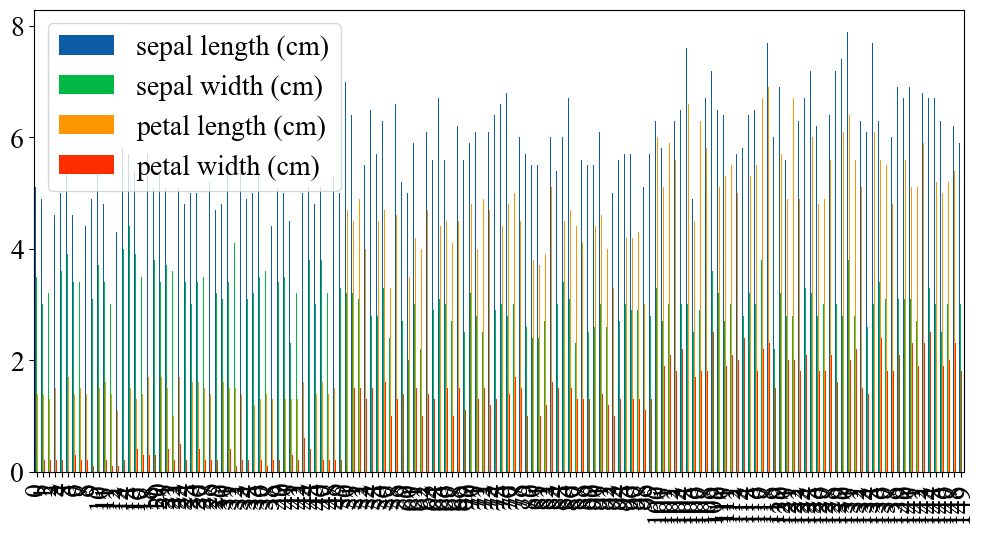

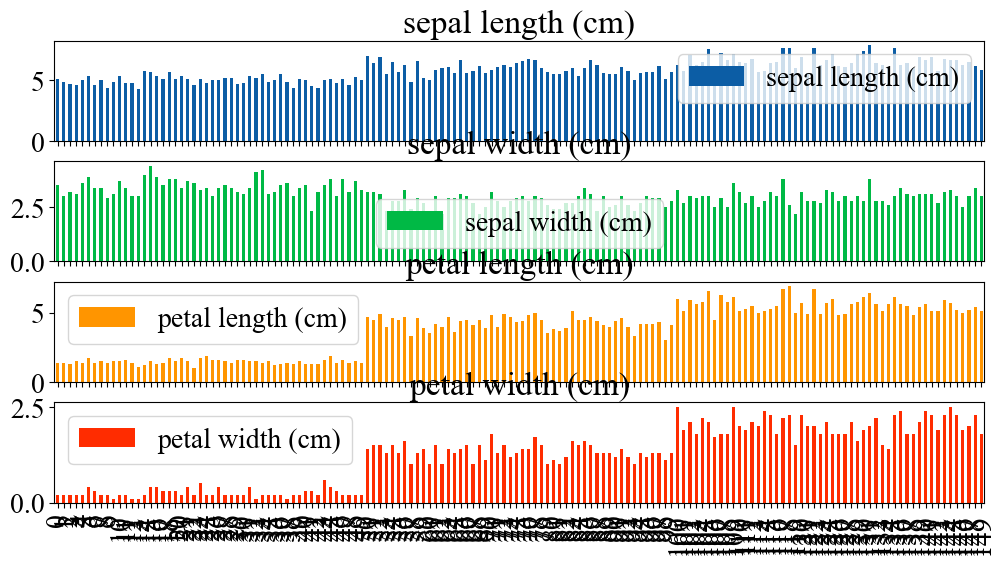

In [10]:
agent.run(prompt.format(query="Plot each column as a barplot!"))

In [11]:
agent.run(prompt.format(query="Which row has the biggest difference between petal length and petal width?"))



> Entering new AgentExecutor chain...
Thought: This requires me to compare the petal length and petal width values of each row and determine the row with the biggest difference.
Action: python_repl_ast
Action Input: df['difference'] = df['petal length (cm)'] - df['petal width (cm)']
Observation: 
Thought: I can now find the row with the biggest difference
Action: python_repl_ast
Action Input: df.loc[df['difference'].idxmax()]
Observation: sepal length (cm)    7.7
sepal width (cm)     2.8
petal length (cm)    6.7
petal width (cm)     2.0
difference           4.7
Name: 122, dtype: float64
Thought: I now know the final answer
Final Answer: Row 122 has the biggest difference between petal length and petal width.

> Finished chain.


'Row 122 has the biggest difference between petal length and petal width.'

In [14]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'difference'],
      dtype='object')



> Entering new AgentExecutor chain...
Thought: I need to create a visualization to show the distributions for each column.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt
Observation: 
Thought: Now I can use matplotlib to create a visualization of the distributions.
Action: python_repl_ast
Action Input: df.hist()
Observation: [[<Axes: title={'center': 'sepal length (cm)'}>
  <Axes: title={'center': 'sepal width (cm)'}>]
 [<Axes: title={'center': 'petal length (cm)'}>
  <Axes: title={'center': 'petal width (cm)'}>]
 [<Axes: title={'center': 'difference'}> <Axes: >]]
Thought: I now have the visualization of the distributions.
Final Answer: The distributions for each column can be visualized using matplotlib.

> Finished chain.


'The distributions for each column can be visualized using matplotlib.'

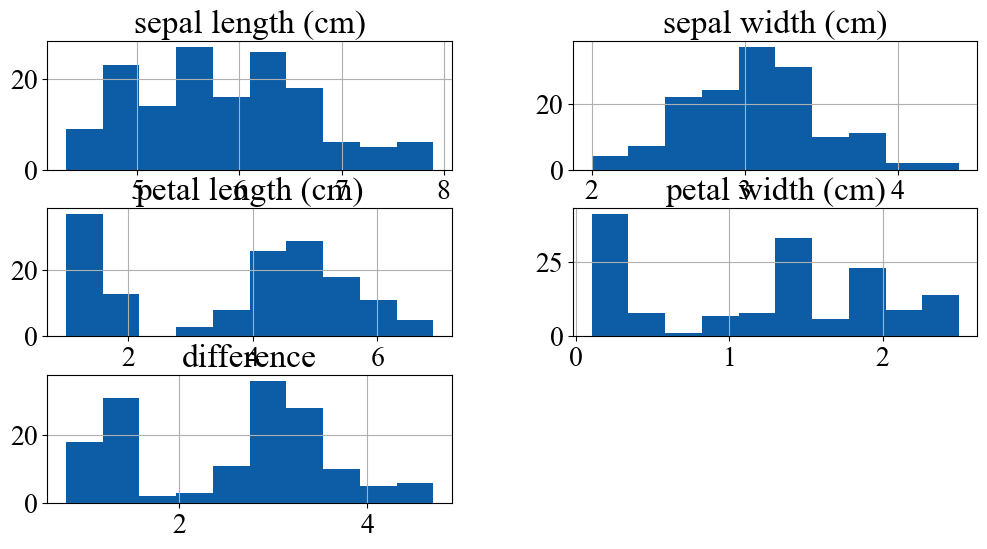

In [20]:
agent.run(prompt.format(query="Show the distributions for each column visually!"))


In [18]:
agent.run(prompt.format(query="Validate the following hypothesis statistically: petal width and petal length come from the same distribution."))



> Entering new AgentExecutor chain...
Thought: I should use a statistical test to answer this question.
Action: python_repl_ast 
Action Input: from scipy.stats import ks_2samp
Observation: 
Thought: I now have the necessary tools to answer this question.
Action: python_repl_ast
Action Input: ks_2samp(df['petal width (cm)'], df['petal length (cm)'])
Observation: KstestResult(statistic=0.6666666666666666, pvalue=6.639808432803654e-32, statistic_location=2.5, statistic_sign=1)
Thought: I now know the final answer
Final Answer: The p-value of 6.639808432803654e-32 indicates that the two variables come from different distributions.

> Finished chain.


'The p-value of 6.639808432803654e-32 indicates that the two variables come from different distributions.'